# **TASK 5:- TRAFFIC ACCIDENT DATA ANALYSIS**

The task here is to analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.



The dataset used here is Road Accidents Dataset from Kaggle.

https://www.kaggle.com/datasets/nezukokamaado/road-accident-casualties-dataset

**IMPORTING THE LIBRARIES**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING THE DATASET**

In [50]:
data = pd.read_csv('Accident Data.csv')
data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [52]:
# Handle missing values and clean the data
data.dropna(inplace=True)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642796 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    642796 non-null  object 
 1   Accident_Severity        642796 non-null  object 
 2   Accident Date            642796 non-null  object 
 3   Latitude                 642796 non-null  float64
 4   Light_Conditions         642796 non-null  object 
 5   District Area            642796 non-null  object 
 6   Longitude                642796 non-null  float64
 7   Number_of_Casualties     642796 non-null  int64  
 8   Number_of_Vehicles       642796 non-null  int64  
 9   Road_Surface_Conditions  642796 non-null  object 
 10  Road_Type                642796 non-null  object 
 11  Urban_or_Rural_Area      642796 non-null  object 
 12  Weather_Conditions       642796 non-null  object 
 13  Vehicle_Type             642796 non-null  object 
dtypes: f

In [54]:
data.describe(include = 'all')

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,642796,642796,642796,642796.000000,642796,642796,642796.000000,642796.000000,642796.000000,642796,642796,642796,642796,642796
unique,410527,3,1461,NaN,5,422,NaN,NaN,NaN,5,5,3,8,16
top,2.01E+12,Slight,31-01-2019,NaN,Daylight,Birmingham,NaN,NaN,NaN,Dry,Single carriageway,Urban,Fine no high winds,Car
freq,232088,547721,679,NaN,471923,12980,NaN,NaN,NaN,433973,482274,408917,517874,484493
mean,NaN,NaN,NaN,52.554473,NaN,NaN,-1.425328,1.360354,1.832897,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.410298,NaN,NaN,1.381917,0.828114,0.716968,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,49.914430,NaN,NaN,-7.516225,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,51.490413,NaN,NaN,-2.320826,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,52.304737,NaN,NaN,-1.405574,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,53.455597,NaN,NaN,-0.229388,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN


In [55]:
data.head(10)

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
5,200701BS67159,Serious,18-09-2019,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car
6,200701BS67207,Serious,05-09-2019,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under
7,200701BS67370,Fatal,03-10-2019,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car
8,200701BS67515,Slight,31-10-2019,51.493319,Darkness - lights lit,Kensington and Chelsea,-0.173572,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
9,200701BS67543,Slight,18-10-2019,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc
10,200701BS67644,Serious,09-10-2019,51.491944,Darkness - lights lit,Kensington and Chelsea,-0.171898,1,2,Dry,Single carriageway,Urban,Fine no high winds,Goods 7.5 tonnes mgw and over
11,200701BS67747,Fatal,02-11-2019,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)


# ***ANALYSIS***

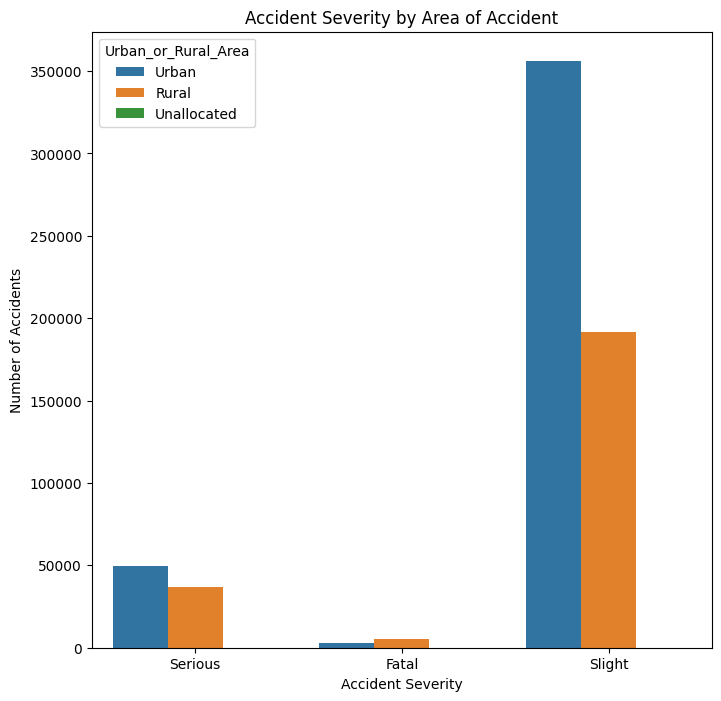

In [56]:
plt.figure(figsize=(8, 8))
sns.countplot(x='Accident_Severity', data=data, hue='Urban_or_Rural_Area')
plt.title('Accident Severity by Area of Accident')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()


Daylight                       471923
Darkness - lights lit          126767
Darkness - no lighting          36868
Darkness - lighting unknown      4766
Darkness - lights unlit          2472
Name: Light_Conditions, dtype: int64


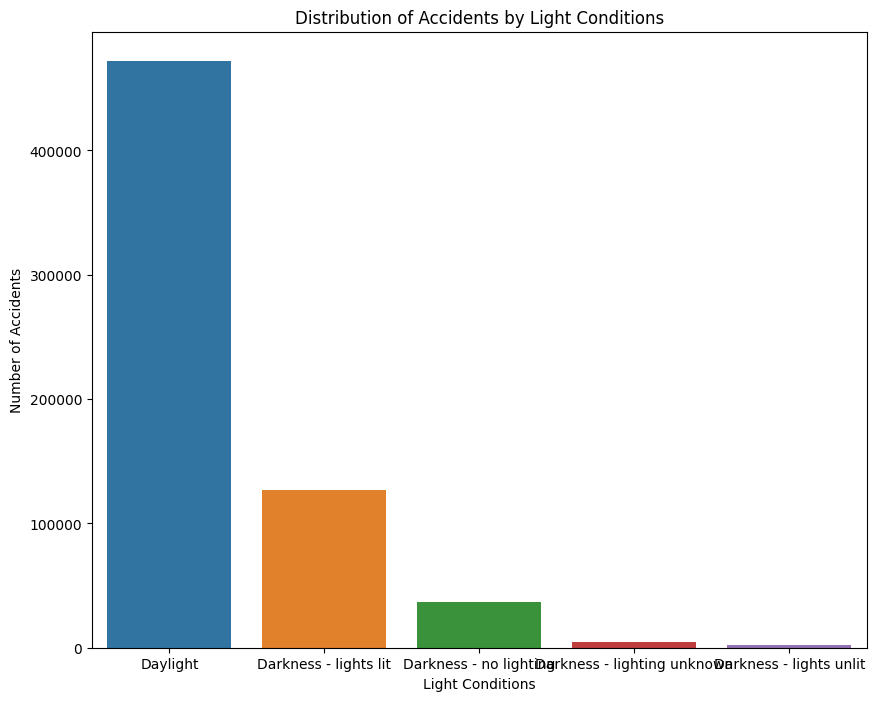

In [57]:
light_conditions_counts = data['Light_Conditions'].value_counts()
print(light_conditions_counts)

plt.figure(figsize=(10, 8))
sns.barplot(x=light_conditions_counts.index, y=light_conditions_counts.values)
plt.title('Distribution of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.show()


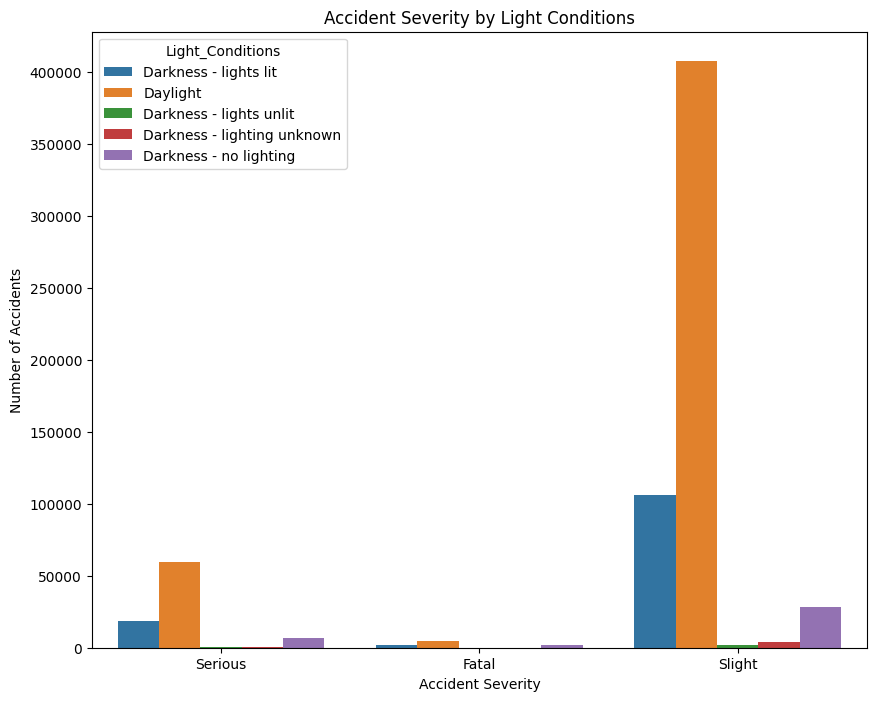

In [58]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Accident_Severity', data=data, hue='Light_Conditions')
plt.title('Accident Severity by Light Conditions')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()


<ipython-input-59-9fd753c09edb>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Accident Date'] = pd.to_datetime(data['Accident Date'])


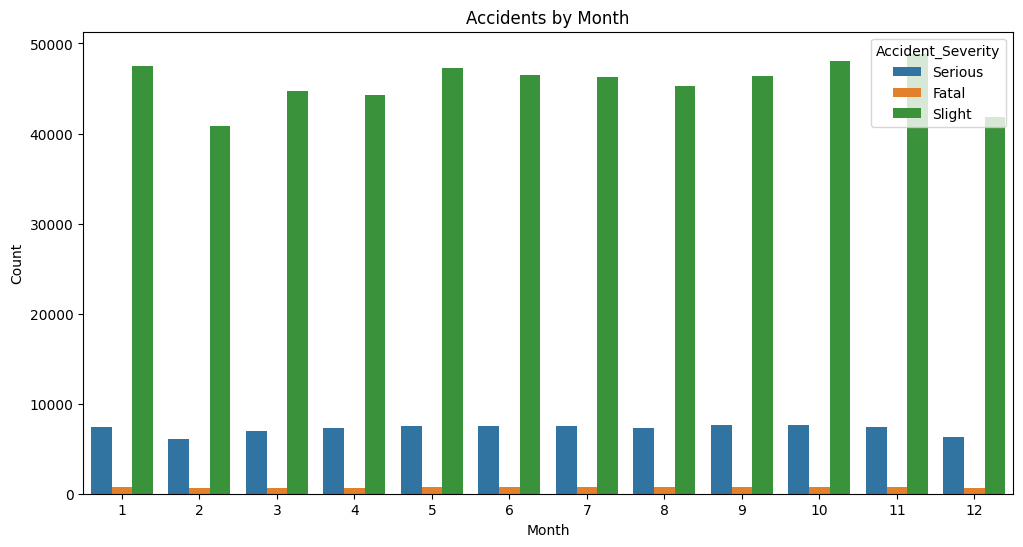

In [59]:
# Time analysis
data['Accident Date'] = pd.to_datetime(data['Accident Date'])
data['Month'] = data['Accident Date'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=data, hue='Accident_Severity')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

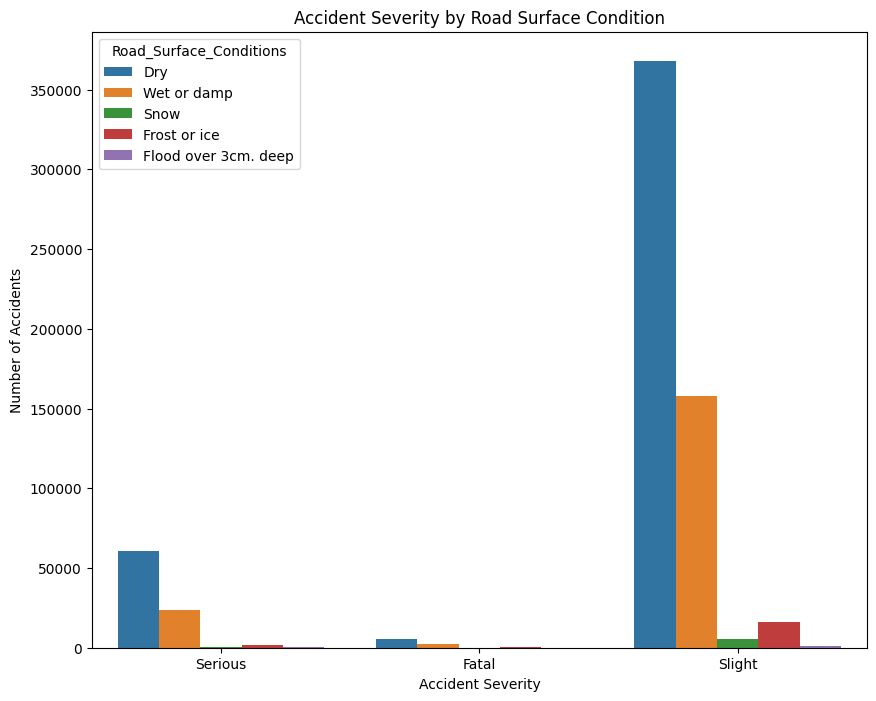

In [60]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Accident_Severity', data=data, hue='Road_Surface_Conditions')
plt.title('Accident Severity by Road Surface Condition')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()

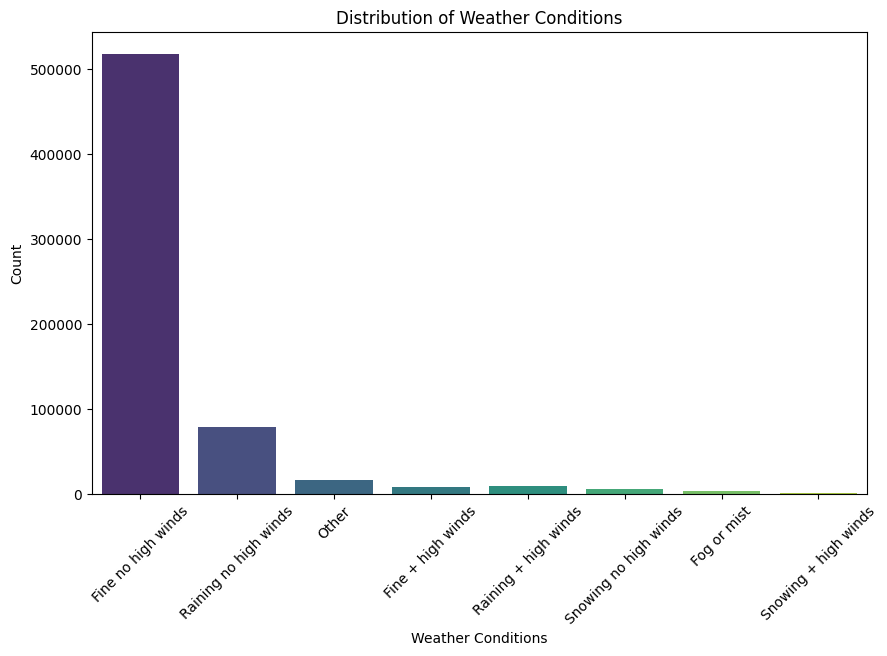

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Conditions', data=data, palette='viridis')
plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

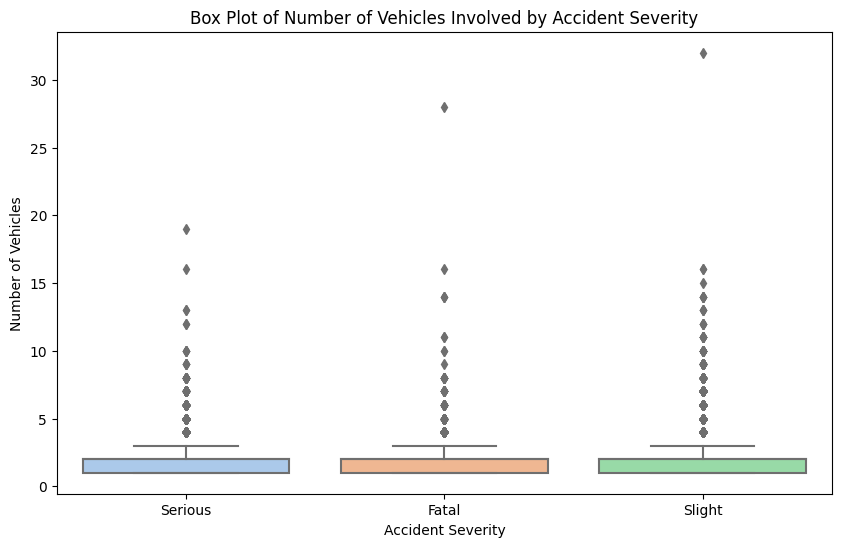

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_Severity', y='Number_of_Vehicles', data=data, palette='pastel')
plt.title('Box Plot of Number of Vehicles Involved by Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Vehicles')
plt.show()

***Inference:-***

The number of vehicles involved in accidents tends to increase with the severity of the accident. This is likely because more serious accidents often involve multiple vehicles colliding with each other, while slight accidents may only involve two vehicles.


The distribution of the number of vehicles involved in accidents is relatively symmetrical for all three severities.
There are a few outliers in each of the severity categories. These outliers could be due to factors such as chain-reaction accidents or accidents involving large trucks or buses.

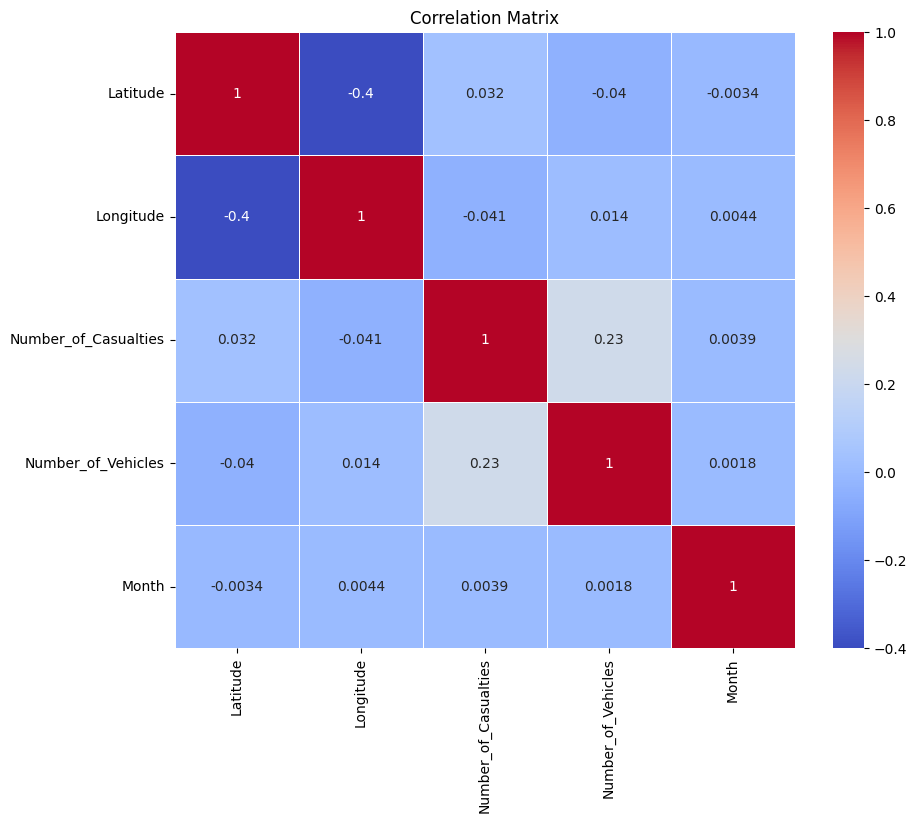

In [71]:
plt.figure(figsize=(10, 8))
columns = ['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Month']
correlation_matrix = data[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

***Inference:-***

-> There is positive correlation between Number of Vehicles & Number of Casualties indicating that as number of vehicles that faced accidents increases, the casualties also increase.

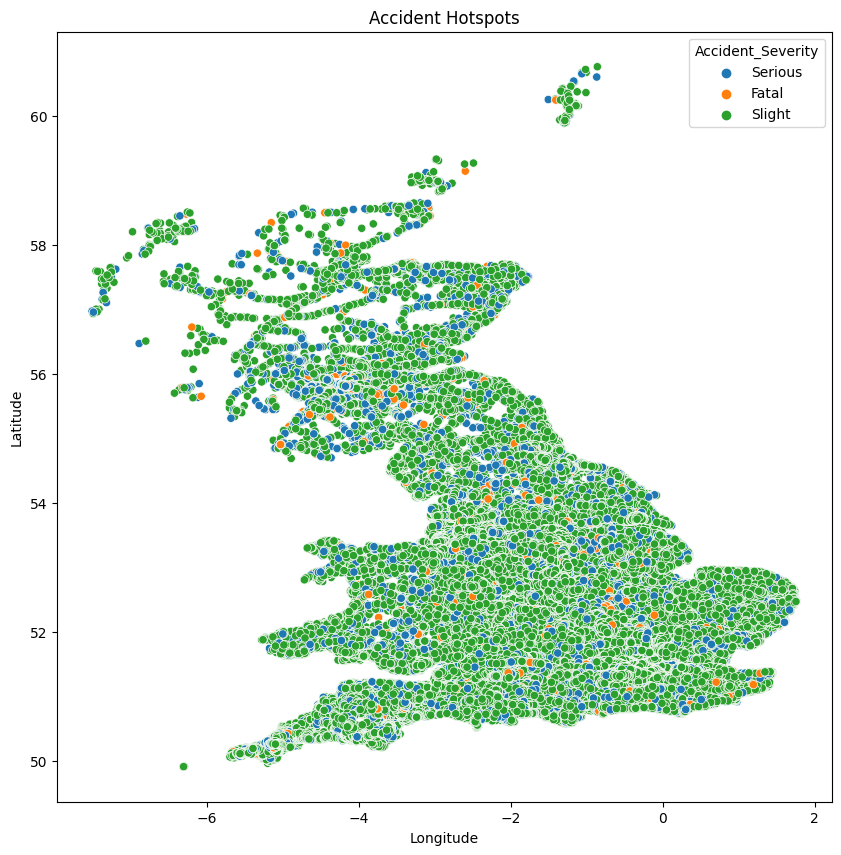

In [64]:
# Geospatial analysis based on Latitude and Longitude
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Longitude', y='Latitude', hue='Accident_Severity', data=data)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

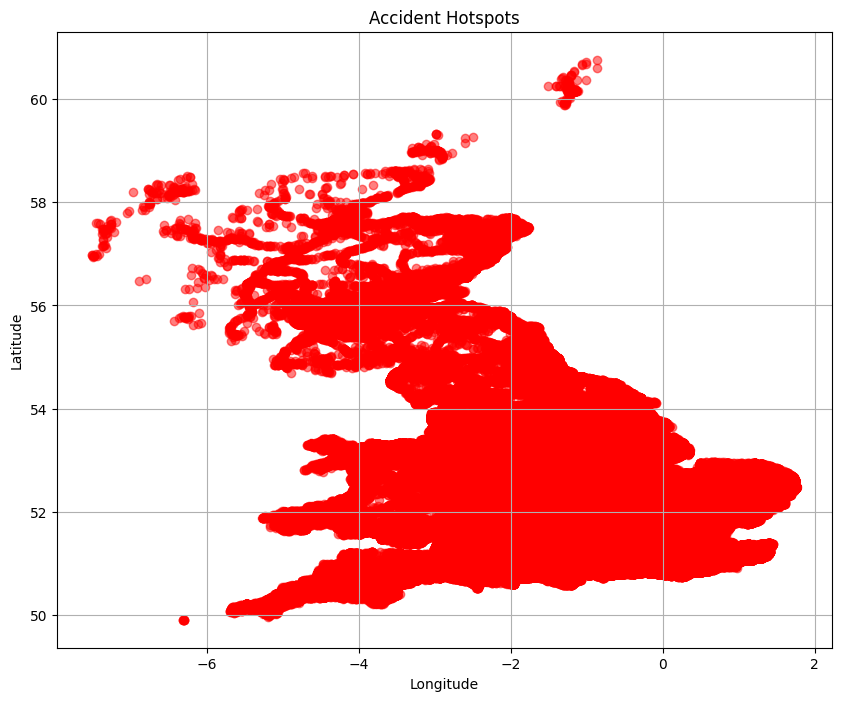

In [65]:
# Plotting accident hotspots using latitude and longitude
plt.figure(figsize=(10, 8))
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5, c='red')
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


# ***INFERENCE:-***

From the above graphs and charts, we can conclude that majority of the accidents that have taken place are in normal conditions such as No High Winds, Dry Roads, Daylight, Urban areas and almost all the months of the calendar year and are not that serious or fatal.